In [118]:
import mysql.connector
from mysql.connector import errorcode
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
import pickle
import imdb_funcs
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [120]:
# get connection:
cnx = mysql.connector.connect(
    host = 'flatiron.cscixofgkh2c.us-east-2.rds.amazonaws.com',
    user = 'omar',
    passwd = 'EuRc%{Zxq%<"P34(',
    database = 'movie_project'
)

In [119]:
cnx.close()

In [121]:
print(cnx)

In [122]:
curs = cnx.cursor()

In [132]:
curs.execute("""select actor_id, first_name, last_name, pop_rank, round(avg(movies.bo_gu), 0) as avg_bo_gu, round(avg(movies.bo_ww), 0) as avg_bo_ww, round(avg(movies.bo_ow), 0) as avg_bo_ow, round(avg(movies.budget),0) as avg_budget, round(round(avg(movies.bo_ww), 0)/round(avg(movies.budget),0), 2) as ROR
                from actors
                join moviesxactors
                using (actor_id)
                join movies
                using (title_id)
                where title_id in (select movies.title_id
                                    from movies
                                    where bo_gu != 0 and bo_ww != 0 and bo_ow != 0 and budget!=0)
                                    group by actor_id
                                    order by pop_rank""")
# df = pd.DataFrame(curs.fetchall())
# df.columns = [x[0] for x in curs.description]
# df

results = curs.fetchall()

In [133]:
results

[('nm0262635',
  'Chris',
  'Evans',
  1,
  Decimal('499967777'),
  Decimal('1366691545'),
  Decimal('195937777'),
  Decimal('242310345'),
  Decimal('5.64')),
 ('nm0000375',
  'Robert',
  'Downey',
  2,
  Decimal('457850688'),
  Decimal('1213873097'),
  Decimal('177364668'),
  Decimal('217856923'),
  Decimal('5.57')),
 ('nm2225369',
  'Jennifer',
  'Lawrence',
  3,
  Decimal('153428451'),
  Decimal('375123340'),
  Decimal('48120494'),
  Decimal('112870833'),
  Decimal('3.32')),
 ('nm1475594',
  'Channing',
  'Tatum',
  4,
  Decimal('103232334'),
  Decimal('198668028'),
  Decimal('30561065'),
  Decimal('59225000'),
  Decimal('3.35')),
 ('nm0000123',
  'George',
  'Clooney',
  5,
  Decimal('85564006'),
  Decimal('194383680'),
  Decimal('21732030'),
  Decimal('60463415'),
  Decimal('3.21')),
 ('nm3053338',
  'Margot',
  'Robbie',
  7,
  Decimal('146745981'),
  Decimal('374180002'),
  Decimal('45802988'),
  Decimal('98960000'),
  Decimal('3.78')),
 ('nm0001467',
  'Jared',
  'Leto',
  8,
 

In [163]:
float(results[0][8])

5.64

In [135]:
def create_labels(list1):
    actor_names = []
    for i in range(len(list1)):
        
        actor_names.append(str((list1[i][3])) +'. '+ str(list1[i][1])+' '+str(list1[i][2]))
    return actor_names

In [136]:
actor_names = create_labels(results)

In [137]:
def loops_for_money(data_frame, column_loc):
    list1 = []
    for item in data_frame:
        list1.append(int(round(int(item[column_loc])/1000000,0)))
    return list1

In [138]:
def loops_for_int(data_frame, column_loc):
    list1 = []
    for item in data_frame:
        list1.append(int(round(int(item[column_loc]), 0)))
    return list1

In [165]:
def loops_for_flt(data_frame, column_loc):
    list1 = []
    for item in data_frame:
        list1.append(float(item[column_loc]))
    return list1

In [139]:
avg_bo_ug = loops_for_money(results, 4)

In [140]:
avg_bo_ww = loops_for_money(results, 5)

In [141]:
avg_bo_op = loops_for_money(results, 6)

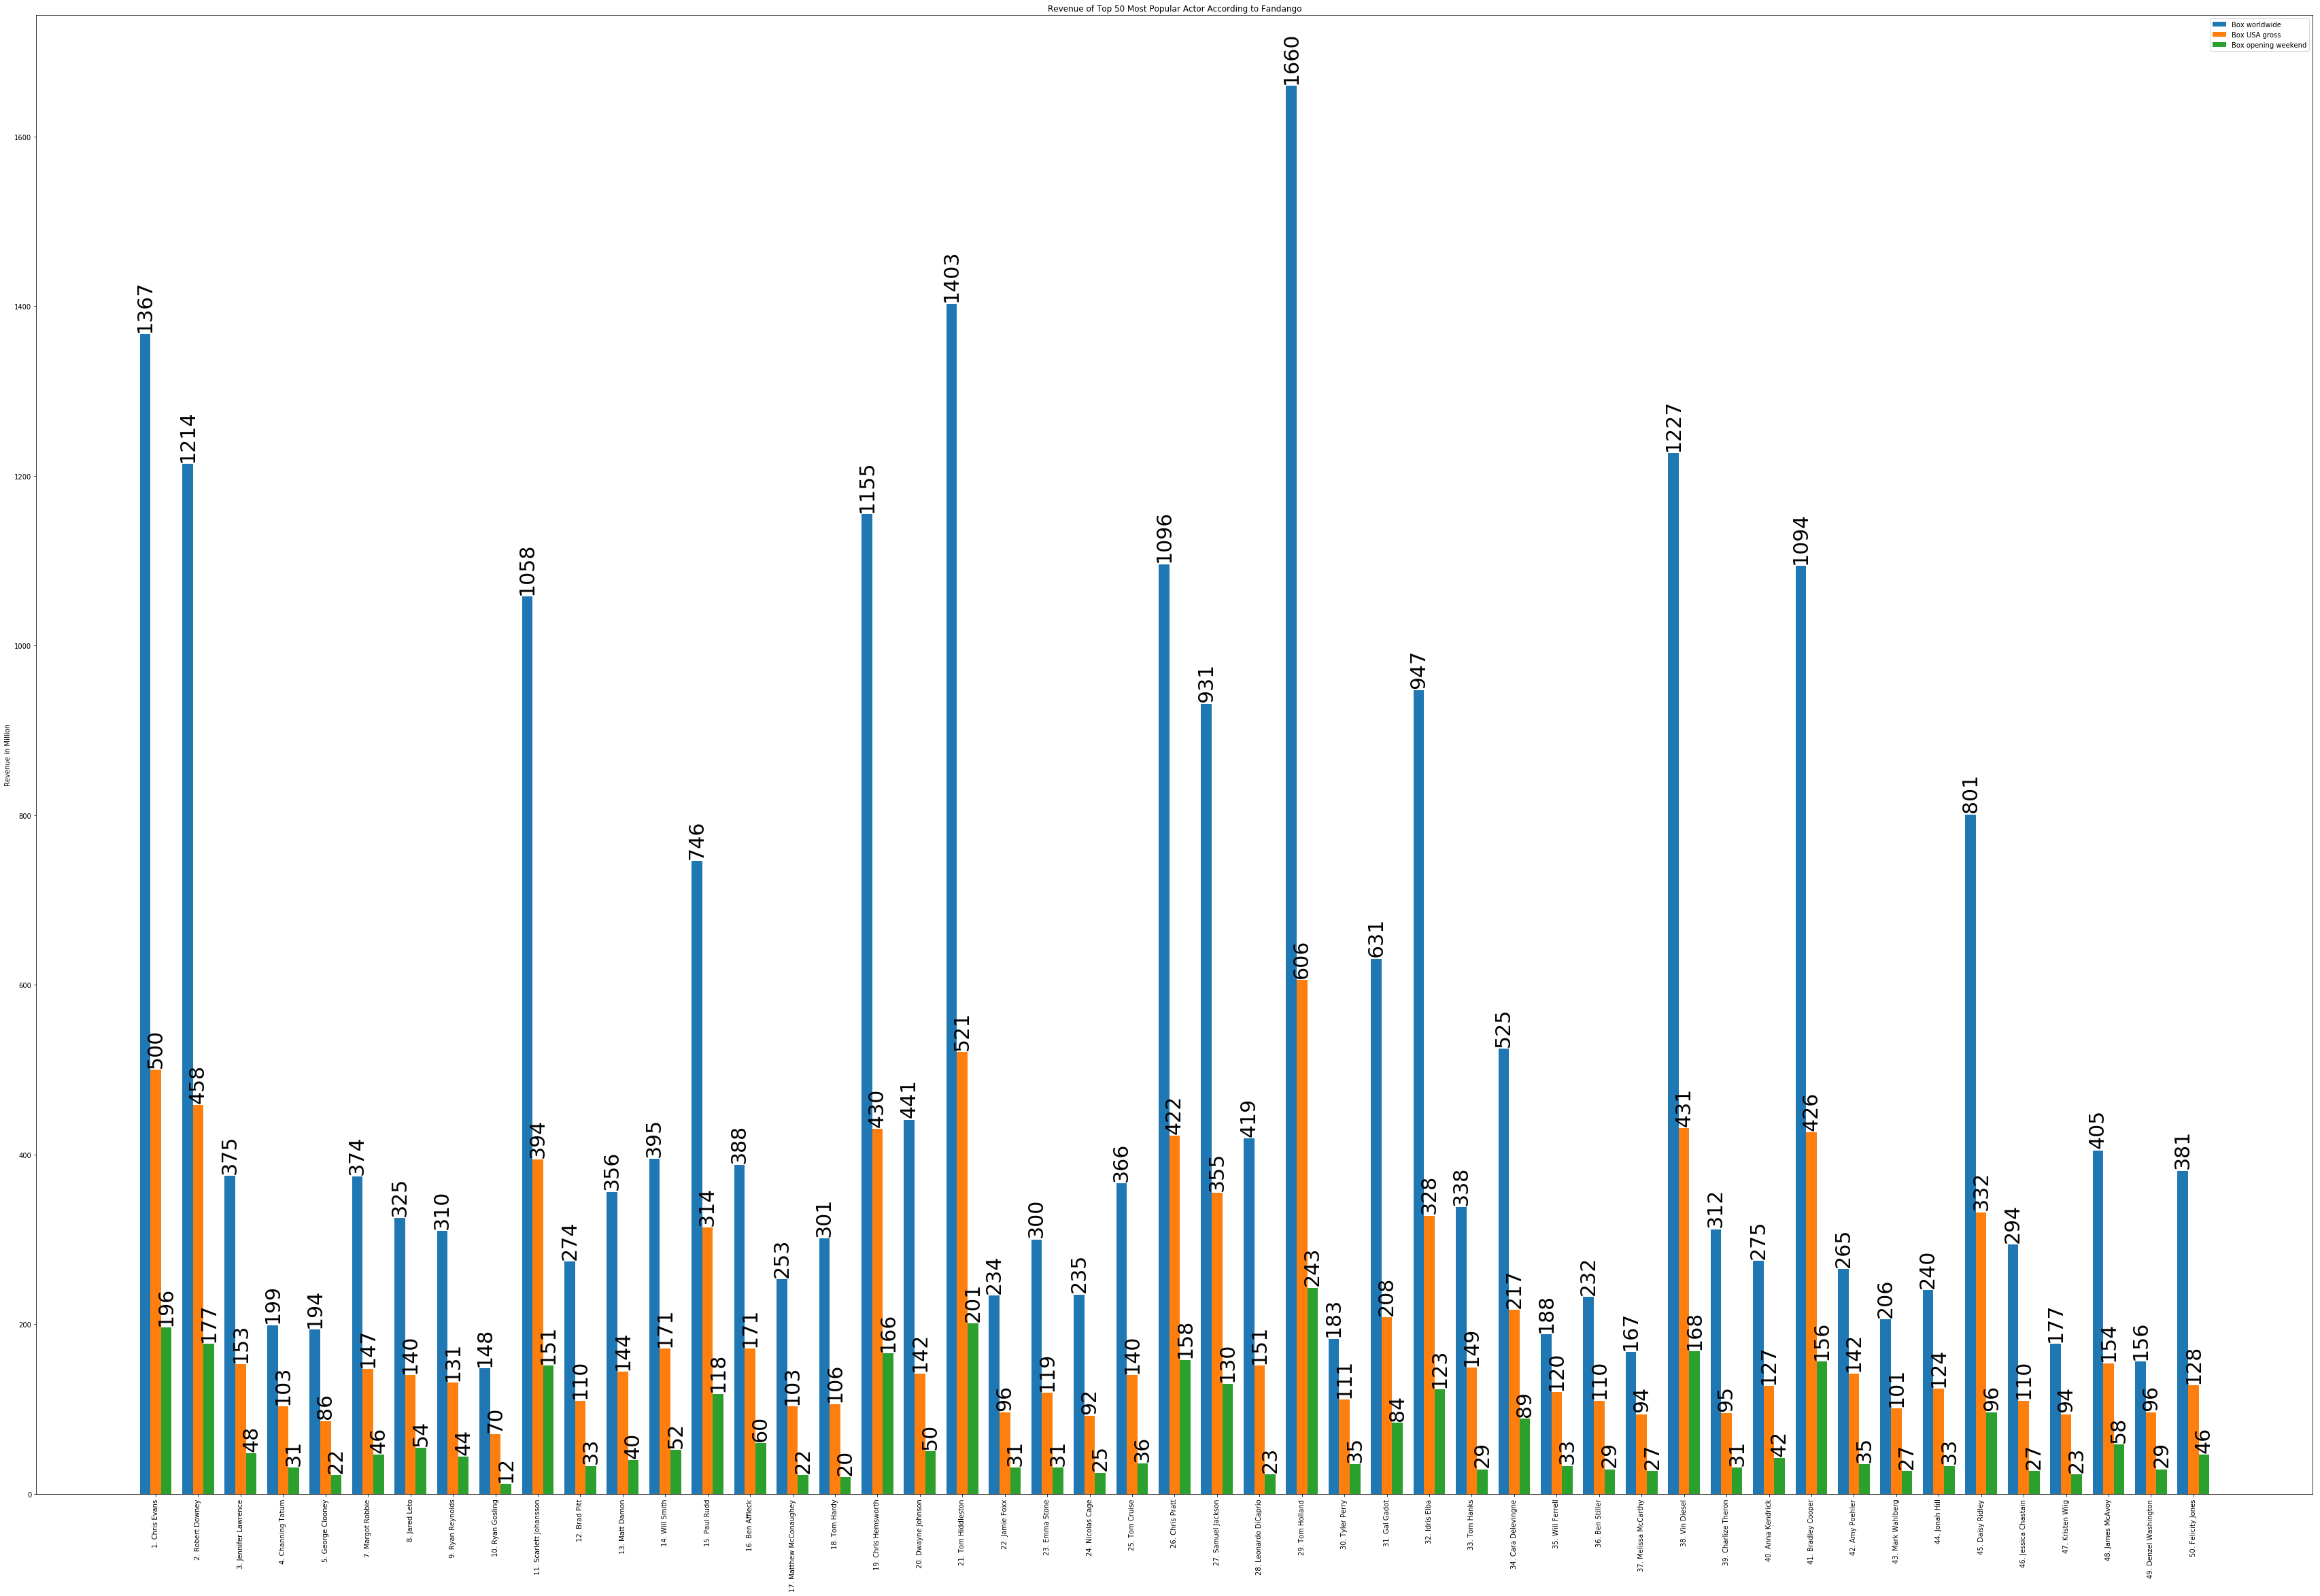

In [142]:
x = np.arange(len(actor_names))  # the label locations
 # the width of the bars

fig, ax = plt.subplots(figsize=(60,40))
rects1 = ax.bar(x - 0.25, avg_bo_ww, width=0.25, align = 'center', label='Box worldwide')
rects2 = ax.bar(x , avg_bo_ug, width=0.25, align='center', label='Box USA gross')
rects3 = ax.bar(x  + 0.25, avg_bo_op, width=0.25, align='center', label='Box opening weekend')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenue in Million')
ax.set_title('Revenue of Top 50 Most Popular Actor According to Fandango')
ax.set_xticks(x)
ax.set_xticklabels(actor_names, rotation = 90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90)

plt.rcParams.update({'font.size': 30})

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# fig.tight_layout()

plt.show()

In [143]:
curs.execute("""select actor_id, first_name, last_name, pop_rank, round(avg(budget),0) as Avg_Budget, round(avg(bo_ww),0) as Avg_Box_WW
                from actors
                join moviesxactors
                using(actor_id)
                join movies

                using (title_id)
                group by actor_id
                order by pop_rank""")
# df = pd.DataFrame(curs.fetchall())
# df.columns = [x[0] for x in curs.description]
# df

results_1 = curs.fetchall()

In [144]:
avg_budget = loops_for_lables(results, 7)

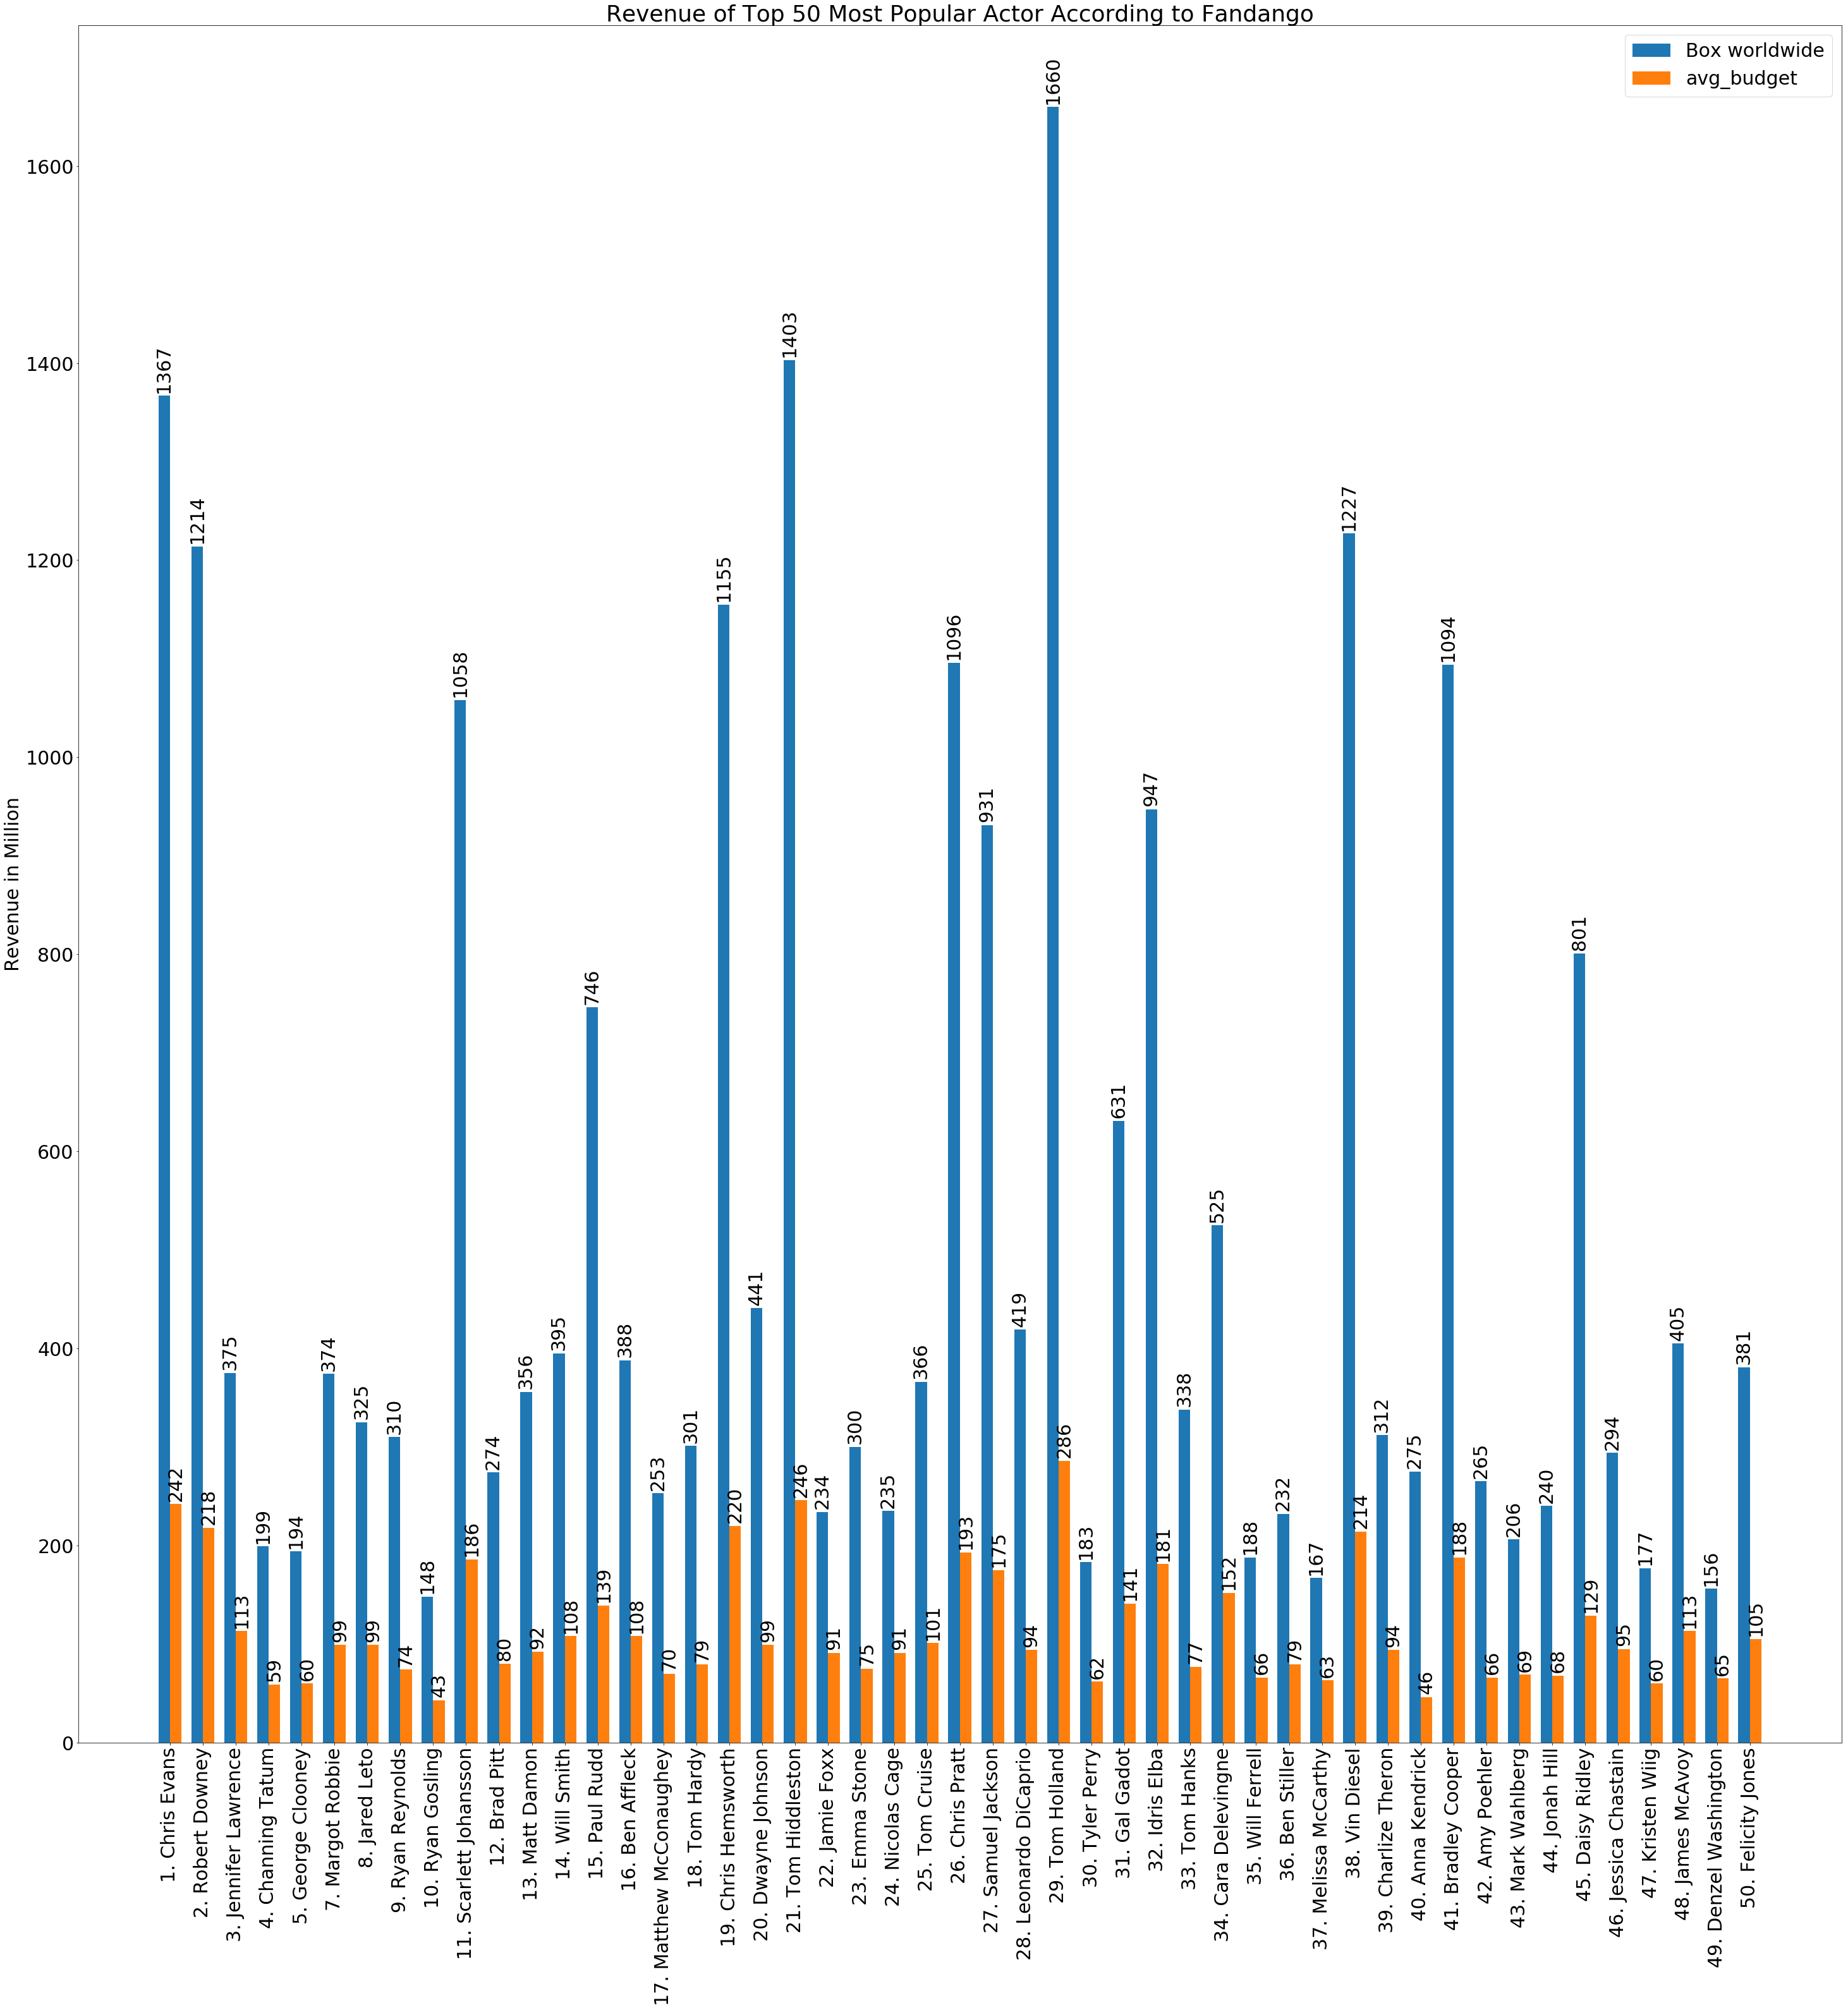

In [145]:
x = np.arange(len(actor_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(50,50))
rects1 = ax.bar(x - width/2, avg_bo_ww, width, label='Box worldwide')
rects2 = ax.bar(x  + width/2 , avg_budget, width, label='avg_budget')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenue in Million')
ax.set_title('Revenue of Top 50 Most Popular Actor According to Fandango')
ax.set_xticks(x)
ax.set_xticklabels(actor_names, rotation = 90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation= 90)

plt.rcParams.update({'font.size': 30})

autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

plt.show()

In [146]:
curs.execute("""select actor_id, first_name, last_name, pop_rank, round(avg(movies.meta_score), 0)
                from actors
                join moviesxactors
                using (actor_id)
                join movies
                using (title_id)
                where title_id in (select movies.title_id
                                    from movies
                                    where meta_score != 0)
                                    group by actor_id
                                    order by pop_rank""")
# df = pd.DataFrame(curs.fetchall())
# df.columns = [x[0] for x in curs.description]
# df

In [147]:
results_2 = curs.fetchall()

In [148]:
results_2

[('nm0262635', 'Chris', 'Evans', 1, Decimal('62')),
 ('nm0000375', 'Robert', 'Downey', 2, Decimal('64')),
 ('nm2225369', 'Jennifer', 'Lawrence', 3, Decimal('60')),
 ('nm1475594', 'Channing', 'Tatum', 4, Decimal('62')),
 ('nm0000123', 'George', 'Clooney', 5, Decimal('68')),
 ('nm3053338', 'Margot', 'Robbie', 7, Decimal('60')),
 ('nm0001467', 'Jared', 'Leto', 8, Decimal('56')),
 ('nm0005351', 'Ryan', 'Reynolds', 9, Decimal('51')),
 ('nm0331516', 'Ryan', 'Gosling', 10, Decimal('66')),
 ('nm0424060', 'Scarlett', 'Johansson', 11, Decimal('66')),
 ('nm0000093', 'Brad', 'Pitt', 12, Decimal('64')),
 ('nm0000354', 'Matt', 'Damon', 13, Decimal('64')),
 ('nm0000226', 'Will', 'Smith', 14, Decimal('51')),
 ('nm0748620', 'Paul', 'Rudd', 15, Decimal('61')),
 ('nm0000255', 'Ben', 'Affleck', 16, Decimal('53')),
 ('nm0000190', 'Matthew', 'McConaughey', 17, Decimal('59')),
 ('nm0362766', 'Tom', 'Hardy', 18, Decimal('66')),
 ('nm1165110', 'Chris', 'Hemsworth', 19, Decimal('64')),
 ('nm0425005', 'Dwayne', 

In [149]:
metascore = loops_for_int(results_2, 4)

In [150]:
metascore

[62,
 64,
 60,
 62,
 68,
 60,
 56,
 51,
 66,
 66,
 64,
 64,
 51,
 61,
 53,
 59,
 66,
 64,
 51,
 69,
 54,
 56,
 51,
 60,
 66,
 60,
 68,
 71,
 47,
 55,
 59,
 66,
 42,
 52,
 54,
 51,
 64,
 54,
 58,
 60,
 51,
 55,
 66,
 65,
 62,
 64,
 59,
 62,
 55]

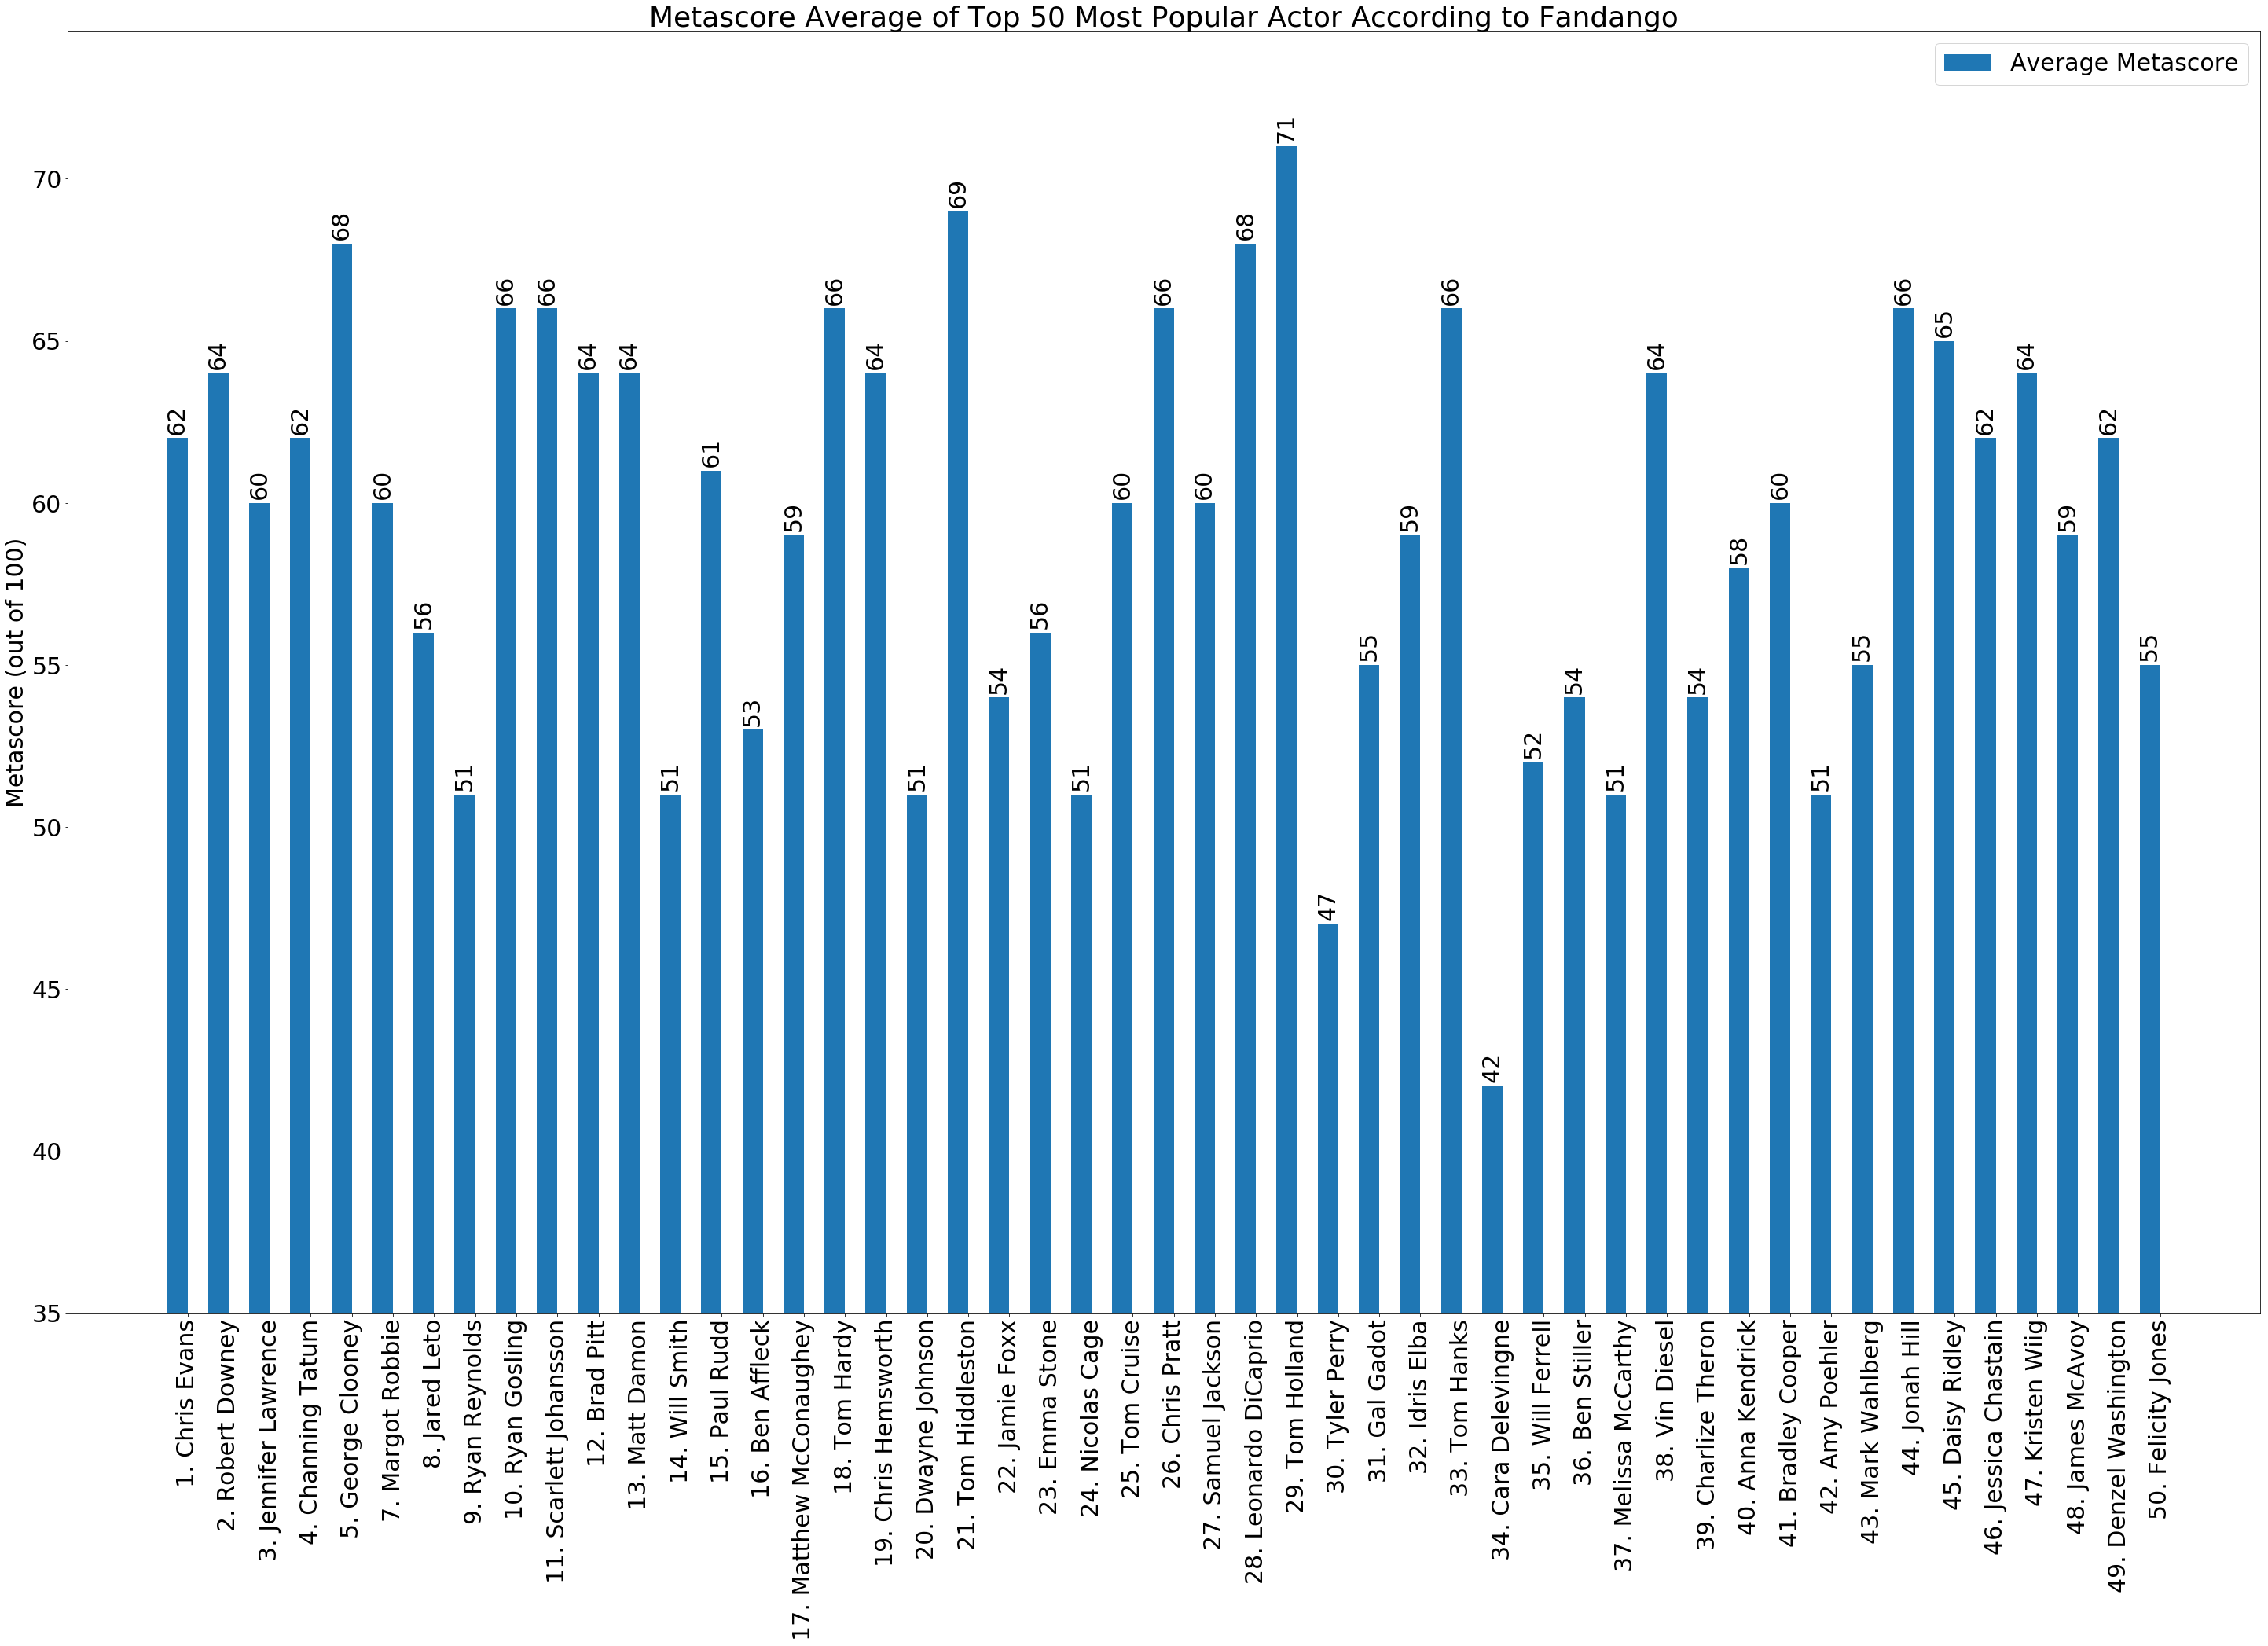

In [173]:
x = np.arange(len(actor_names))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(50,30))
rects1 = ax.bar(x - width/2, metascore, width, label='Average Metascore')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metascore (out of 100)')
ax.set_ylim(bottom=35)
ax.set_title('Metascore Average of Top 50 Most Popular Actor According to Fandango')
ax.set_xticks(x)
ax.set_xticklabels(actor_names, rotation = 90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation= 90)

plt.rcParams.update({'font.size': 30})

autolabel(rects1)

# fig.tight_layout()

plt.show()

In [167]:
ROR = loops_for_flt(results, 8)

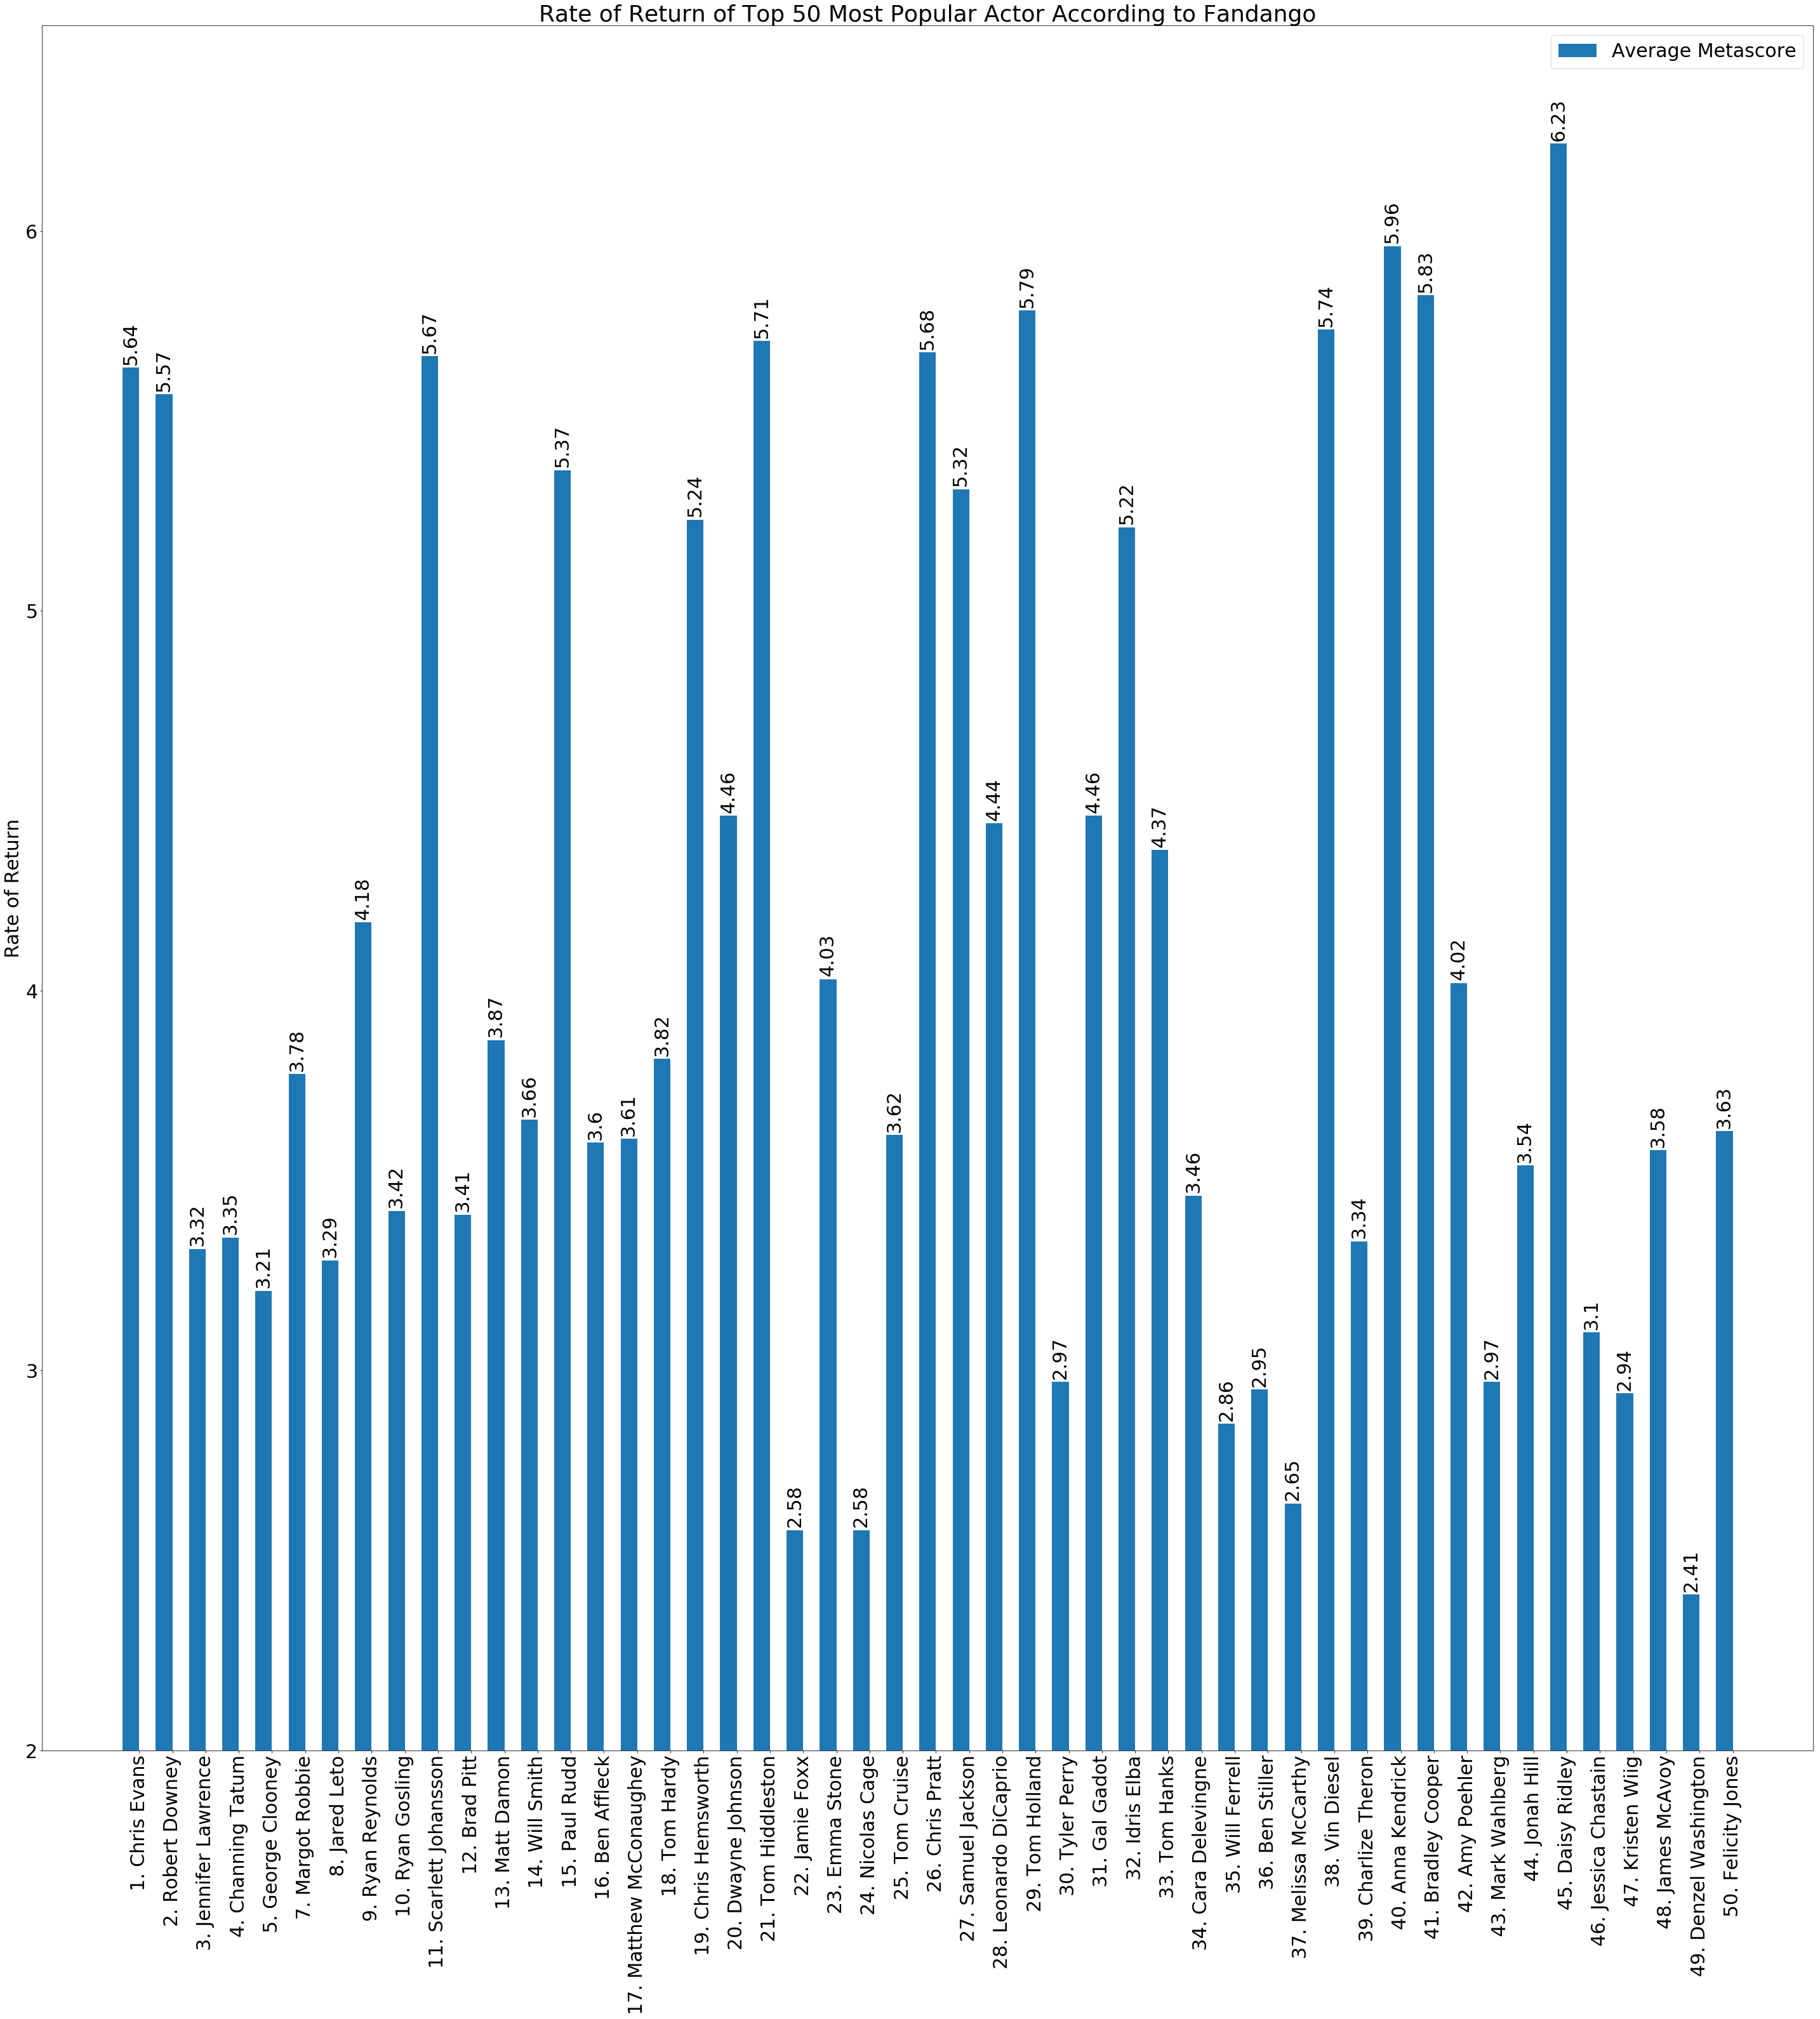

In [174]:
x = np.arange(len(actor_names))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(50,50))
rects1 = ax.bar(x - width/2, ROR, width, label='Average Metascore')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rate of Return')
ax.set_ylim(bottom=2)
ax.set_title('Rate of Return of Top 50 Most Popular Actor According to Fandango')
ax.set_xticks(x)
ax.set_xticklabels(actor_names, rotation = 90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation= 90)

plt.rcParams.update({'font.size': 30})

autolabel(rects1)

# fig.tight_layout()

plt.show()

In [152]:
curs.execute("""select actor_id, first_name, last_name, pop_rank, social_rank
                from actors
                where social_rank != 0
                order by social_rank desc""")

results_4 = curs.fetchall()

In [51]:
results_4

[('nm0000136', 'Johnny', 'Depp', 6, 117891701),
 ('nm0000158', 'Tom', 'Hanks', 33, 117891701),
 ('nm0000138', 'Leonardo', 'DiCaprio', 28, 100423198),
 ('nm0004874', 'Vin', 'Diesel', 38, 100423198),
 ('nm0002071', 'Will', 'Ferrell', 35, 93188564),
 ('nm0001774', 'Ben', 'Stiller', 36, 93188564),
 ('nm2225369', 'Jennifer', 'Lawrence', 3, 76930952),
 ('nm0000226', 'Will', 'Smith', 14, 76930952),
 ('nm0425005', 'Dwayne', 'Johnson', 20, 70837131),
 ('nm0004937', 'Jamie', 'Foxx', 22, 63673149),
 ('nm1089991', 'Tom', 'Hiddleston', 21, 56155889),
 ('nm0000129', 'Tom', 'Cruise', 25, 56155889),
 ('nm1347153', 'Tyler', 'Perry', 30, 50410684),
 ('nm0262635', 'Chris', 'Evans', 1, 29812663),
 ('nm0000168', 'Samuel', 'Jackson', 27, 21767290)]

In [55]:
social_media_rank_list = []
counter = 1
for actor in results_4:
    social_media_rank_list.append(f'{counter}. {actor[1]} {actor[2]}')
    counter += 1
    

In [ ]:
ROI_social_media = []

for actor in results_4:
    

In [56]:
social_media_rank_list

['1. Johnny Depp',
 '2. Tom Hanks',
 '3. Leonardo DiCaprio',
 '4. Vin Diesel',
 '5. Will Ferrell',
 '6. Ben Stiller',
 '7. Jennifer Lawrence',
 '8. Will Smith',
 '9. Dwayne Johnson',
 '10. Jamie Foxx',
 '11. Tom Hiddleston',
 '12. Tom Cruise',
 '13. Tyler Perry',
 '14. Chris Evans',
 '15. Samuel Jackson']